In [3]:
#Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#data importation (corruption index)
pd.read_csv(r'C:\Users\harun\Desktop\Data\corruption.csv') 
corruption=pd.read_csv(r'C:\Users\harun\Desktop\Data\corruption.csv')

In [5]:
#changing index to the date 
corruption_labelled = corruption.set_index('Date')


In [180]:
#slicing 
corruption_labelled_2019 = corruption_labelled.loc[2019][['country','Value']]
corruption_labelled_2019

In [160]:
#sorting df in ascending order using country
corruption_new = corruption_labelled_2019.sort_values('country')

In [221]:
#Nested if (conditional) statement to return a new column "rank"
#Defining a new function (rank)
def rank(df):
    if df['Value'] <= 40:
        return 'Very clean'
    elif df['Value'] > 40 and df['Value'] <= 80:
        return 'Clean'
    elif df['Value'] > 80 and df['Value'] <= 120:
        return 'Average'
    elif df['Value'] > 120 and df['Value'] <= 160:
        return 'Corrupt'
    else:
    #elif df['Value'] > 160 and df['Value'] <= 200:
        return 'Highly Corrupt'


In [190]:
corruption_new['rank'] = corruption_new.apply(rank, axis=1)


In [215]:
#Renaming a column
corruption_final = corruption_new.rename(columns={'Value':'corruption index'})
corruption_final.shape


(179, 3)

In [218]:
corruption_final.head(5)
                     

,country,corruption index,rank
Date,,,
2019,Afghanistan,173,Highly Corrupt
2019,Albania,106,Average
2019,Algeria,106,Average
2019,Angola,146,Corrupt
2019,Argentina,66,Clean


In [20]:
#Data importation (life expectancy)
life_exp = pd.read_csv(r'C:\Users\harun\Desktop\Data\life_expectancy.csv')


In [22]:
#Setting date as index
life_exp_labelled =life_exp.set_index('Date')


In [169]:
#SLicing the rows by 2019 (dropping all 2018 rows) and dropping some colums
life_exp_labelled1 = life_exp_labelled.loc[2019][['country','Value']]

#Sorting in ascending order
life_exp_sorted = life_exp_labelled1.sort_values ('country')

In [263]:
#Renaming column from 'value' to 'years'
life_exp_new = life_exp_labelled1.rename(columns={'Value':'life exp(yrs)'})

#Sorting in alphabetical order
life_exp_new1 = life_exp_new.sort_values('country')

#Rounding uo values
life_exp_final = life_exp_new1.round({'life exp(yrs)':0})

In [264]:
life_exp_final.head(5)

,country,life exp(yrs)
Date,,
2019,Afghanistan,65.0
2019,Albania,79.0
2019,Algeria,77.0
2019,Angola,61.0
2019,Antigua and Barbuda,77.0


In [207]:
#Data importation (GDP per capita)
GDP = pd.read_csv(r'C:\Users\harun\Desktop\Data\GDP.csv')

In [208]:
#Setting date as index
GDP_labelled = GDP.set_index('Date')

In [239]:
#SLicing the rows by 2019 (dropping all 2018 rows) and dropping some colums
GDP_labelled1 = GDP_labelled.loc[2019][['country','Value']]

#sort in ascending order
GDP_sorted = GDP_labelled1.sort_values('country')

#Renaming a column from 'value' to 'gdp'
GDP_final = GDP_sorted.rename(columns={'Value':'gdp'})

#Rounding up to 2 decimal places
GDP_final.round({'gdp':2})

,country,gdp
Date,,
2019,Afghanistan,573.29
2019,Africa Eastern and Southern,1598.38
2019,Albania,5207.31
2019,Algeria,4701.28
2019,American Samoa,9445.81
...,...,...
2019,Vanuatu,2865.79
2019,Vietnam,2082.24
2019,West Bank and Gaza,2951.37


In [210]:
#Data importation (population 2019)
population = pd.read_csv(r'C:\Users\harun\Desktop\Data\population.csv')

In [194]:
#Renaming a column 
population_new = population.rename(columns={'Population in thousands':'population'})

#sort in ascending order
population_sorted = population_new.sort_values('country')
population_sorted

#Round up values to nearest thousand
population_sorted1 = population_sorted.round({"population":0})

population_sorted1.head(10)
population_sorted1.shape


(203, 2)

In [195]:
#Data Importation (Natural resource rent share of GDP)
Nat_res = pd.read_csv(r'C:\Users\harun\Desktop\Data\Nat_res.csv') 

Nat_res.shape


(188, 2)

In [186]:
#concatenating dataframes


In [231]:
#Sort in ascending order using country
Nat_res1 = Nat_res.sort_values('country')

#Round up 'Natural resource' to 2 decimal places
Nat_res2 = Nat_res1.round({"Natural resource rent share of GDP%":2})
Nat_res2.head(10)

,country,Natural resource rent share of GDP%
135,Afghanistan,0.77
30,Albania,1.59
113,Algeria,16.42
31,Andorra,0.00
143,Angola,26.19
79,Antigua and Barbuda,0.00
80,Argentina,2.07
32,Armenia,2.11
1,Australia,5.36
33,Austria,0.13


In [271]:
#Merging dataframes Corruption and life expecatncy
corruption_merged = corruption_final.merge(life_exp_final,how = 'left')

new_df = corruption_merged.merge(GDP_final, how = 'left')

new_df1 = new_df.merge(population_sorted1, how = 'left')

new_df2 = new_df1.merge(Nat_res2, how = 'left')



In [ ]:
#Adding a dictionary

In [274]:
new_df2.dtypes


country                                 object
corruption index                         int64
rank                                    object
life exp(yrs)                          float64
gdp                                    float64
population                             float64
Natural resource rent share of GDP%    float64
dtype: object

In [276]:
new_df2.head(4)



,country,corruption index,rank,life exp(yrs),gdp,population,Natural resource rent share of GDP%
0,Afghanistan,173,Highly Corrupt,65.0,573.287506,38051.0,0.77
1,Albania,106,Average,79.0,5207.305322,2880.0,1.59
2,Algeria,106,Average,77.0,4701.279743,43030.0,16.42
3,Angola,146,Corrupt,61.0,3111.157308,31850.0,26.19


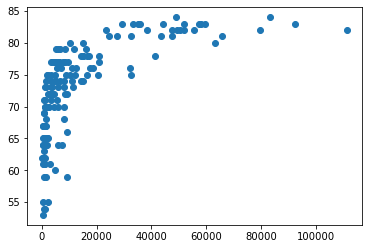

In [322]:
plt.scatter(new_df2['gdp'], new_df2['life exp(yrs)'])

<AxesSubplot:xlabel='gdp', ylabel='life exp(yrs)'>

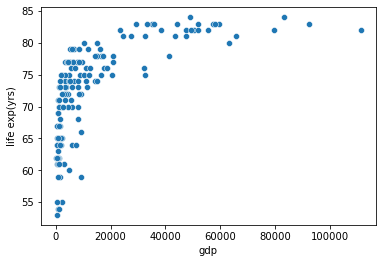

In [323]:
sns.scatterplot(data = new_df2, x = 'gdp',y = 'life exp(yrs)')

<AxesSubplot:xlabel='gdp', ylabel='corruption index'>

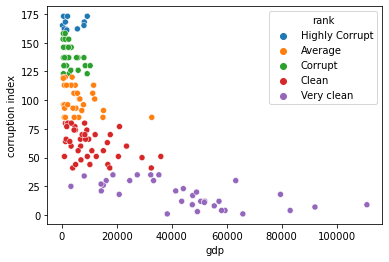

In [327]:
sns.scatterplot(data = new_df2, x = 'gdp',y = 'corruption index', hue = 'rank') 

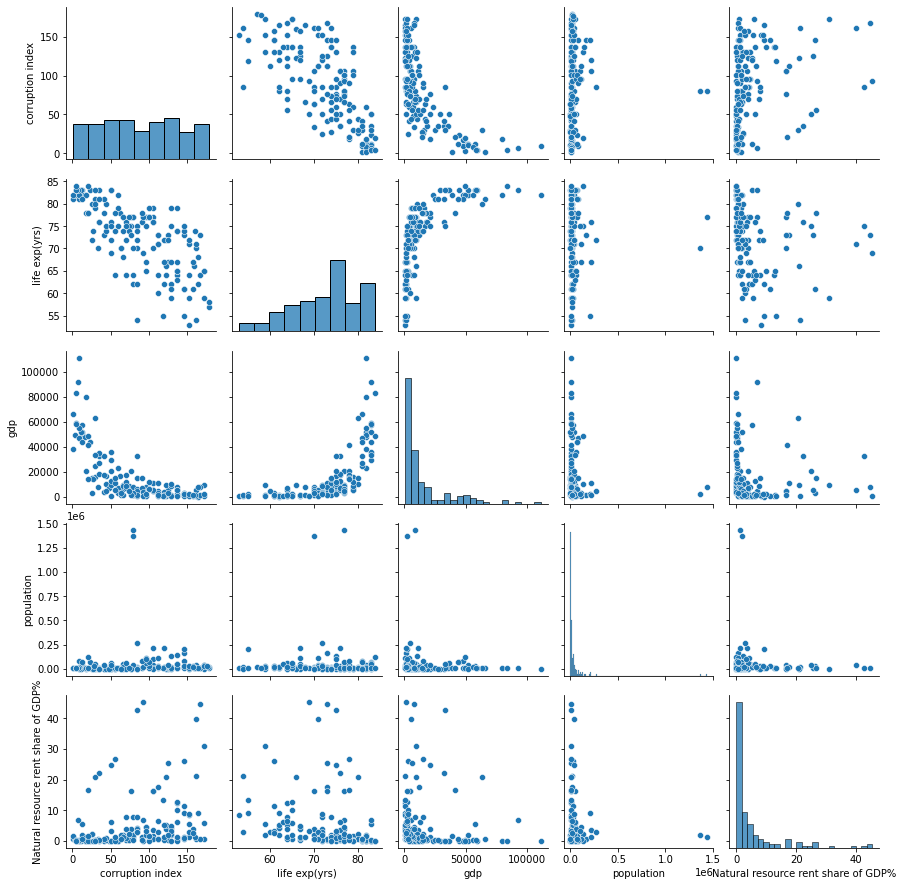

In [306]:
sns.pairplot(new_df2)

<AxesSubplot:xlabel='gdp', ylabel='Natural resource rent share of GDP%'>

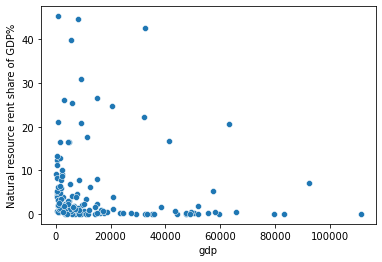

In [334]:
sns.scatterplot(data = new_df2, y = 'Natural resource rent share of GDP%',x = 'gdp')